In [1]:
import numpy as np
import PIL
import cv2
import os

In [2]:
IMAGES_PATH = "./word-images/"
DIRS = [name for name in os.listdir(IMAGES_PATH)]

In [3]:
print(DIRS)

['273', '301', '279', '274', '277', '275', '302', '300', '276', '272', '304', '271', '278', '303', '270']


In [14]:
from matplotlib import pyplot as plt

def import_images():
    images = list()
    for folder in DIRS:
        img_paths = IMAGES_PATH + folder
        for image in os.listdir(img_paths):
            images.append(cv2.imread(img_paths + "/" + image,0))
    return images

def display_image(image):
    plt.imshow(images[13], interpolation='nearest', cmap='gray')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
    

In [19]:
def dtw(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n+1, m+1))
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

96
result: [[ 0. inf inf inf inf inf inf]
 [inf  1.  2.  3.  4.  6.  9.]
 [inf  1.  1.  1.  1.  2.  4.]
 [inf  2.  2.  2.  2.  1.  2.]]


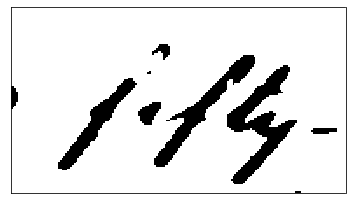

In [22]:
from PIL import Image
images = import_images()
print(len(images[0]))

result = dtw([1,2,3], [2,2,2,2,3,4])
print("result: " + str(result))
display_image(images[0])


error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/highgui/src/window.cpp:632: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
